# Polynomial Regression - Boston Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [16]:
# Hypothetically loading a dataset
data = pd.read_csv('Boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [20]:
data.isnull().sum().sum()

0

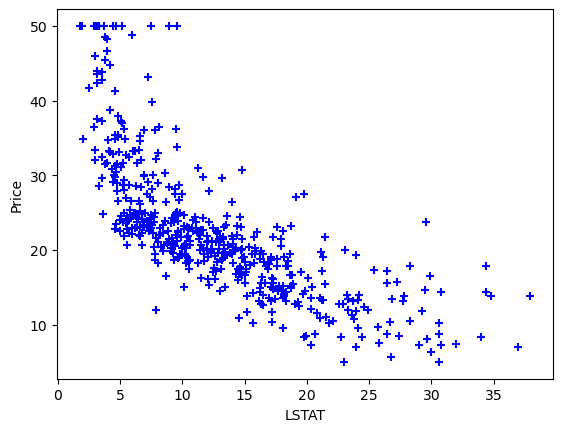

In [26]:
plt.scatter(data['LSTAT'], data['PRICE'] , color='blue', marker = '+')
plt.xlabel("LSTAT")
plt.ylabel('Price')
plt.show()

In [28]:
#X = data.drop('Quality Rating', axis=1)
X = data[['LSTAT']]
y = data['PRICE']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define the degree of the polynomial
# You can adjust the degree as needed
poly = PolynomialFeatures(degree=2)  # y = m1x1 + m2(x2)2 + c 
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [32]:
# Initialize and fit the model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [34]:
# Make predictions
y_pred = model.predict(X_poly_test)

In [36]:
y_pred 

array([25.35573661, 35.48187953, 14.79679441, 31.50266983, 15.42955811,
       21.10794694, 14.60381656, 11.90894124, 19.96163644, 18.26047299,
       14.91095517, 15.57160146, 16.9749758 , 20.62767052, 21.41284152,
       21.52003196, 15.17737878, 12.57286032, 36.66730755, 14.75170938,
       29.51362181, 28.44433342, 12.32380003, 24.37577347, 16.84242037,
       14.74422739, 25.26083449, 14.3329528 , 15.42955811, 18.51545854,
       17.87112999, 28.42679238, 19.27416113, 23.59440727, 12.83132053,
       16.75530457, 34.4478277 , 24.17810105, 17.9031201 , 27.83586811,
       12.91477249, 27.85309652, 36.86051223, 19.69275512, 25.72259452,
       15.56317241, 14.58922956, 29.27913367, 16.28489015, 32.54645798,
       19.47607142, 33.31697963, 14.3260041 , 27.61273546, 36.26187681,
       23.02469868, 16.01367518, 35.90193657, 24.45221508, 14.5096585 ,
       24.63661282, 32.88060697, 35.00336072, 21.47976659, 31.55995466,
       12.16938782, 15.55475256, 29.27913367, 33.85861021, 14.12

In [38]:
# Calculate Mean Squared Error or R² Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 27.36283147864025
R² Score: 0.6268727686008045


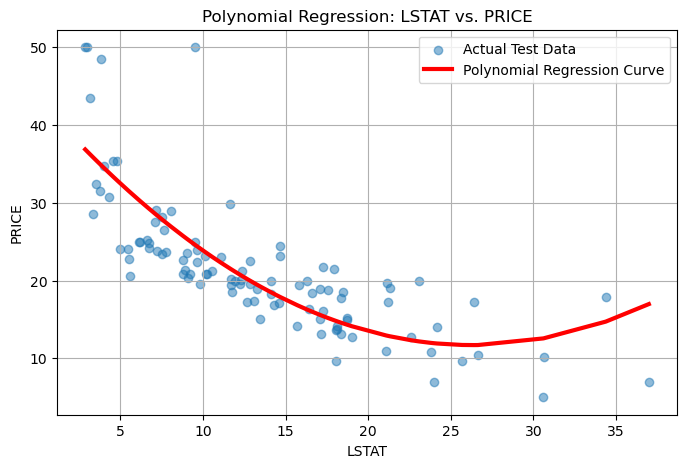

In [48]:
# To draw the curve, we sort the test data and predictions together
plot_df = pd.DataFrame({'X_test': X_test['LSTAT'], 'y_pred': y_pred})
plot_df.sort_values(by='X_test', inplace=True)

# Create the plot
plt.figure(figsize=(8, 5))

# Plot the actual data as a scatter plot
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Test Data')

# Plot the sorted predictions to form the curve
plt.plot(plot_df['X_test'], plot_df['y_pred'], color='red', linewidth=3, label='Polynomial Regression Curve')

plt.title('Polynomial Regression: LSTAT vs. PRICE')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend()
plt.grid(True)
plt.show()